Laborki 06

[Algorytm Deutscha-Jozsy](https://en.wikipedia.org/wiki/Deutsch–Jozsa_algorithm)

[Algorytm Bernsteina-Vaziraniego](https://en.wikipedia.org/wiki/Bernstein–Vazirani_algorithm)


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.providers.basic_provider.basic_simulator import BasicSimulator

backend = BasicSimulator('qasm_simulator')


1. Zaimplementuj kwantowe rozwiązanie podstawowego problemu Deutcha dla jedno-qbitowej funkcji na wybranym symulatorze.


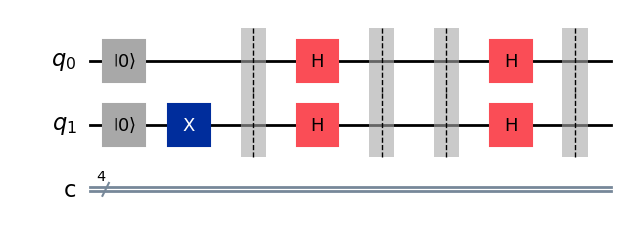

In [2]:
qbits_num = 2

quantum_register = QuantumRegister(qbits_num, 'q')
classical_register = ClassicalRegister(4, 'c')
quantum_circuit = QuantumCircuit(quantum_register, classical_register)

quantum_circuit.reset(range(qbits_num))

# quantum_circuit.x(quantum_register[0])
quantum_circuit.x(quantum_register[1])      # set |y> to 1

# quantum_circuit.z(quantum_register[1])

quantum_circuit.barrier()
quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

# quantum_circuit.cx(quantum_register[0], quantum_register[1])

quantum_circuit.barrier()
quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

quantum_circuit.draw('mpl')

In [4]:
state = Statevector.from_instruction(quantum_circuit)
state.draw('latex')

<IPython.core.display.Latex object>

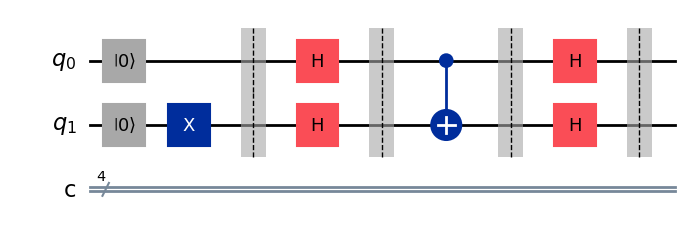

In [5]:
qbits_num = 2

quantum_register = QuantumRegister(qbits_num, 'q')
classical_register = ClassicalRegister(4, 'c')
quantum_circuit = QuantumCircuit(quantum_register, classical_register)

quantum_circuit.reset(range(qbits_num))

# quantum_circuit.x(quantum_register[0])
quantum_circuit.x(quantum_register[1])      # set |y> to 1

# quantum_circuit.z(quantum_register[1])

quantum_circuit.barrier()
quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

quantum_circuit.cx(quantum_register[0], quantum_register[1])

quantum_circuit.barrier()
quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

quantum_circuit.draw('mpl')

In [6]:
state = Statevector.from_instruction(quantum_circuit)
state.draw('latex')
# state = Statevector.from_int(0, 2**2)
# state = state.evolve(quantum_circuit)
# state.draw('qsphere')

<IPython.core.display.Latex object>

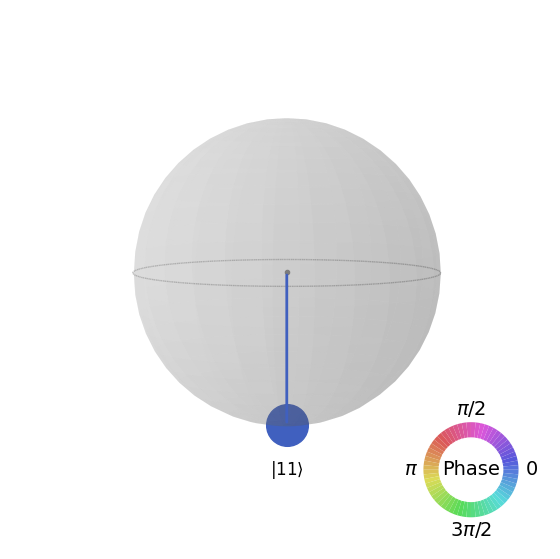

In [55]:
state.draw('qsphere')


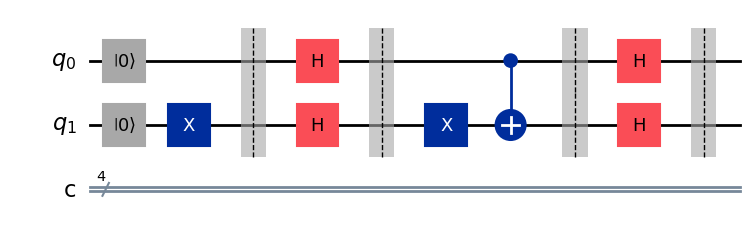

In [11]:
qbits_num = 2

quantum_register = QuantumRegister(qbits_num, 'q')
classical_register = ClassicalRegister(4, 'c')
quantum_circuit = QuantumCircuit(quantum_register, classical_register)

quantum_circuit.reset(range(qbits_num))

# quantum_circuit.x(quantum_register[0])
quantum_circuit.x(quantum_register[1])      # set |y> to 1

# quantum_circuit.z(quantum_register[1])

quantum_circuit.barrier()
quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

quantum_circuit.x(quantum_register[1])
quantum_circuit.cx(quantum_register[0], quantum_register[1])

quantum_circuit.barrier()
quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

quantum_circuit.draw('mpl')

In [12]:
state = Statevector.from_instruction(quantum_circuit)
state.draw('latex')

<IPython.core.display.Latex object>

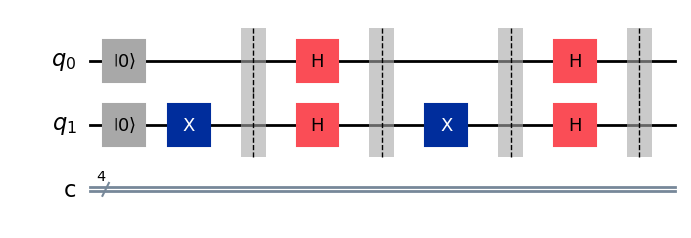

In [15]:
qbits_num = 2

quantum_register = QuantumRegister(qbits_num, 'q')
classical_register = ClassicalRegister(4, 'c')
quantum_circuit = QuantumCircuit(quantum_register, classical_register)

quantum_circuit.reset(range(qbits_num))

# quantum_circuit.x(quantum_register[0])
quantum_circuit.x(quantum_register[1])      # set |y> to 1

# quantum_circuit.z(quantum_register[1])

quantum_circuit.barrier()
quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

quantum_circuit.x(quantum_register[1])
# quantum_circuit.cx(quantum_register[0], quantum_register[1])

quantum_circuit.barrier()
quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

quantum_circuit.draw('mpl')

In [16]:
state = Statevector.from_instruction(quantum_circuit)
state.draw('latex')

<IPython.core.display.Latex object>

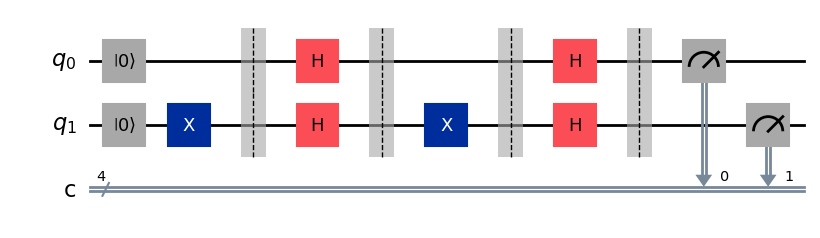

In [17]:
quantum_circuit.measure(quantum_register[0], classical_register[0])
quantum_circuit.measure(quantum_register[1], classical_register[1])

quantum_circuit.draw('mpl')


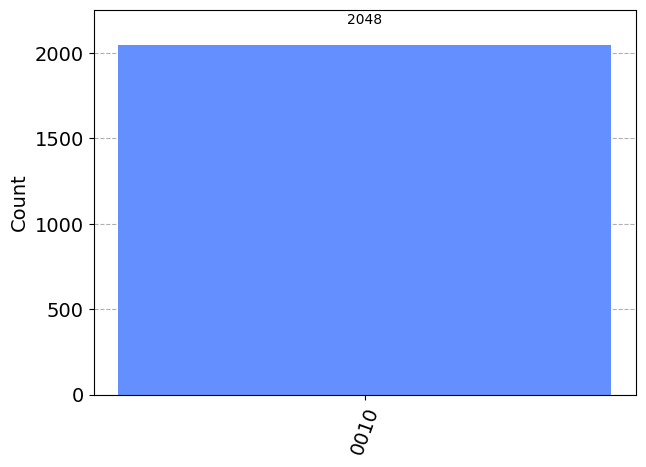

In [18]:
result = backend.run(quantum_circuit, shots=2**11).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(quantum_circuit))

Podczas prezentacji rozwiązania należy umieć odpowiedzieć na pytania:

- na czym polega problem Deutcha ?
    - Mamy daną jedną z czterech funkcji z tabelki 2, ale nie wiemy którą. Chcemy sprawdzić, czy jest ona stała czy zmienna. Ile razy musimy uruchomić tę funkcję, żeby to sprawdzić?
- gdzie są cztery bramki obliczeniowe Uf, do jakich grup należą?
    - 4 bramki Hadamarda + 1 CNOT; należą do grup stałych oraz zmiennych (?)
-  gdzie (na którym qbicie) jest wynik i jak go interpretować? Czy się zgadza ?
    - wynik pojawił się na rejestrze wejściowym; 1 - zmienna, 0 - stała
-  (opcjonalnie) porównaj wyniki symulatora  z wynikami na prawdziwym urządzeniu kwantowym.

2. Zaimplementuj rozwiązanie klasyczne oraz kwantowe  problemu Bernsteina-Vaziraniego na wybranym symulatorze. Podczas prezentacji rozwiązania należy umieć odpowiedzieć na pytania:

-  na czym polega problem ?
    - mamy daną funkcję f, ale nieznamy jej (ustalonego z góry) parametru a, ile razy musimy uruchomić tę funkcję, żeby dowiedzieć się, ile wynosi a?
-  gdzie jest bramka obliczeniowa Uf dla problemu Bernsteina-Vaziraniego?
    - w sandwitchingu Hadamarda
-  w jaki sposób realizujemy rozwiązanie klasyczne, a w jaki kwantowe?
    - n-bitowe maski z każdym z bitów - klasyczne; kwantowe - Hadamard sandwitching
-  (opcjonalnie) porównaj wyniki symulatora z wynikami na prawdziwym urządzeniu kwantowym.

In [19]:
a_param = '11001'

In [20]:
def c_not(value, control):
    return value if not control else not value

q0 = False
a, a_prim = [True, False, True, False, True], []

for c in a:
    a_prim.append(c_not(q0, c))
    
print(f'{a=}')
print(f'{a_prim=}')

a=[True, False, True, False, True]
a_prim=[True, False, True, False, True]


In [21]:
s = a_param

n = len(s)
circuit = QuantumCircuit(n+1,n)


circuit.reset(range(n))
circuit.x(n)

circuit.barrier()
circuit.h(range(n+1))
circuit.barrier()

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier()
circuit.h(range(n+1))
circuit.barrier()

circuit.measure(range(n), range(n))

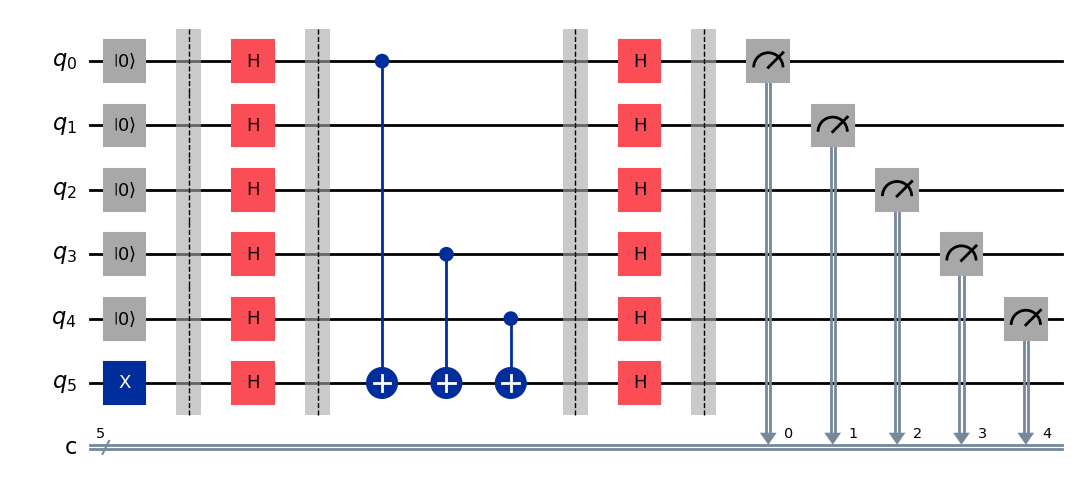

In [59]:
circuit.draw(output='mpl')

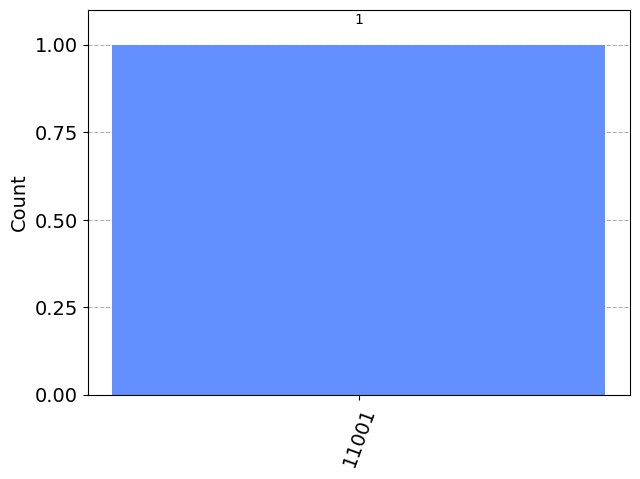

In [22]:
result = backend.run(circuit, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))